In [1]:
import numpy as np
import pandas as pd
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin

warnings.filterwarnings('ignore')

In [2]:
df_r = pd.read_csv('Datasets/winequality-red.csv')
df_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_w = pd.read_csv('Datasets/winequality-white.csv', sep='[:, ;]', engine='python')
drop = ['"total', 'sulfur.1', 'dioxide".1', '"density"', '"pH"', '"sulphates"','"alcohol"', '"quality"']
df_w = df_w.drop(drop, axis=1)
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
df_w.columns.values[0:12]=columns
df_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
def kmeans(X, n_clusters, max_iterations):
    # Randomly select samples for clusters
    rng = np.random.RandomState(2)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    iteration = 0
    while iteration is not max_iterations:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        iteration+=1
        
        
    # Calculate the inertia (sum of squares errors)
    inertia = sum(((centers[l] - x)**2).sum()
                        for x, l in zip(X, labels))
        
    return centers, labels, inertia

In [5]:
def Labels(X, clusterNum, max_iterations):
    Kmeans, labels, inertia = kmeans(X, clusterNum, max_iterations)
    return labels

In [6]:
def clustering(df):
    df_dropped = df.drop('quality', axis=1)
    X =df_dropped.values[:, 1:]
    Clus_dataset = StandardScaler().fit_transform(X)
    return X, Clus_dataset, df_dropped
X, Clus_dataset_r, df_r_dropped = clustering(df_r)
Y, Clus_dataset_w, df_w_dropped = clustering(df_w)

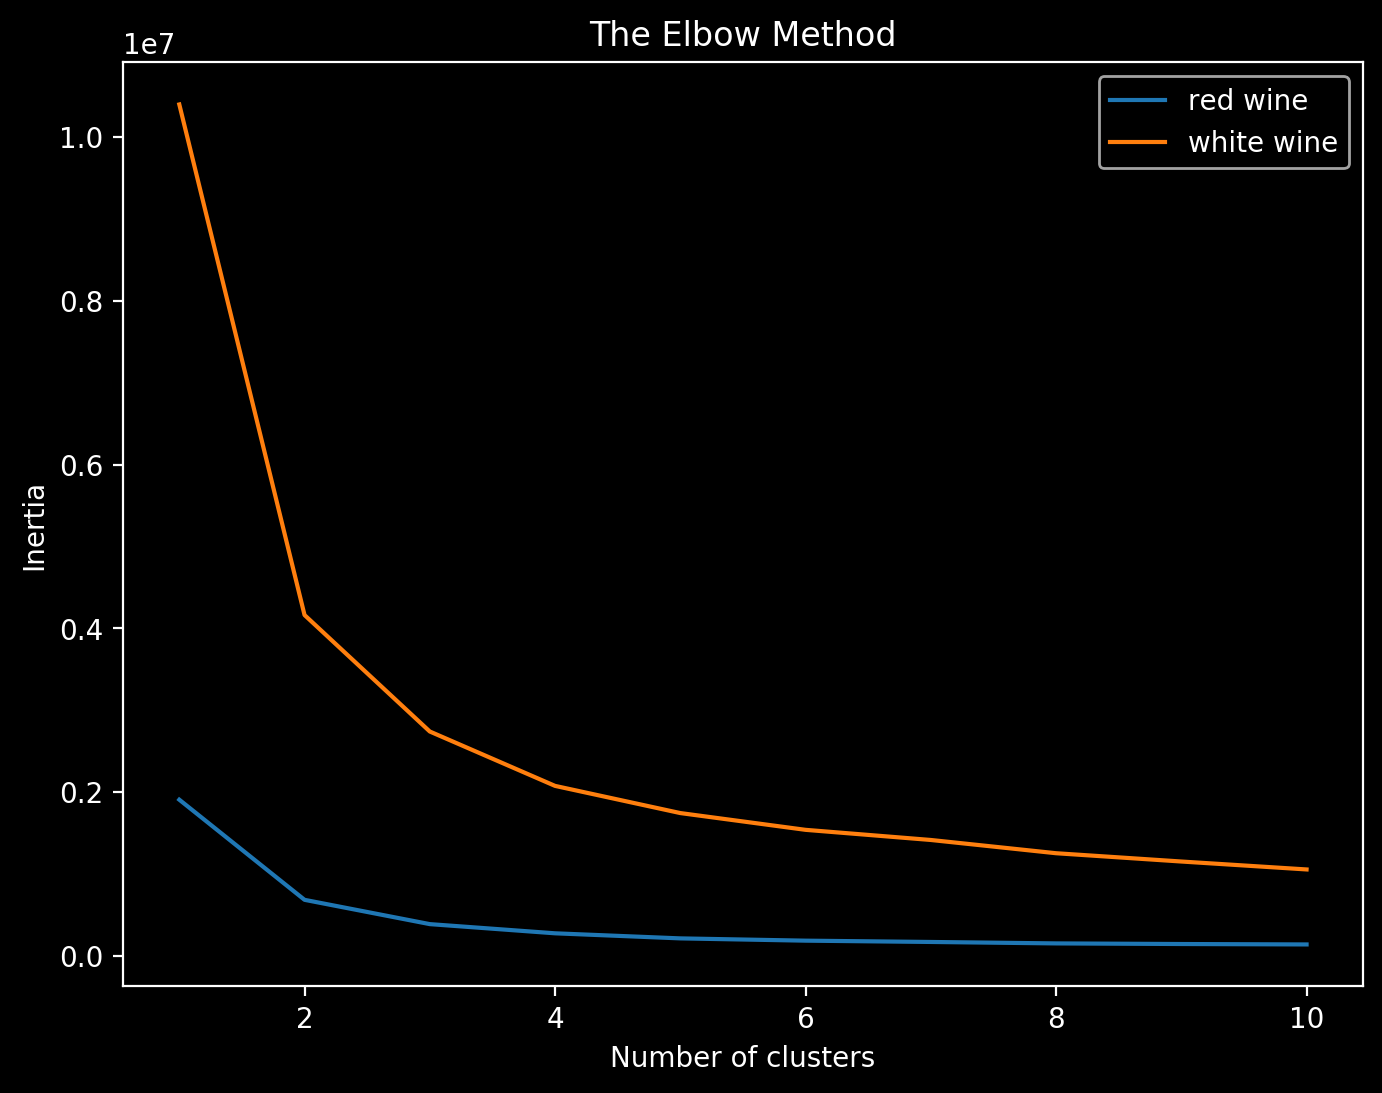

In [7]:
inertia_r = []
inertia_w = []
max_iterations = 300
for i in range(1,11):
    KMeans, labels, inertia = kmeans(X, i, max_iterations)
    inertia_r.append(inertia)
    KMeans, labels, inertia = kmeans(Y, i, max_iterations)
    inertia_w.append(inertia)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertia_r,label='red wine')
plt.plot(range(1,11),inertia_w,label='white wine')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

In [8]:
# build the model with the output from elbow method which is 3 for both datasets
clusterNum = 3
labels_r = Labels(X, clusterNum, max_iterations)
labels_w = Labels(Y, clusterNum, max_iterations)
print(labels_r)
print(labels_w)

[2 0 0 ... 0 0 0]
[0 1 2 ... 2 2 2]


In [9]:
df_r_dropped['Clus_km'] = labels_r
print(df_r_dropped.head())
print(df_r_dropped.groupby('Clus_km').mean())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Clus_km  
0      9.4        2  
1      9.8        0  
2      9.8        0 

In [10]:
df_w_dropped['Clus_km'] = labels_w
print(df_w_dropped.head())
print(df_w_dropped.groupby('Clus_km').mean())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  Clus_km  
0      8.8        0  
1      9.5        1  
2     10.1        2 

Text(0, 0.5, 'total sulfur dioxide')

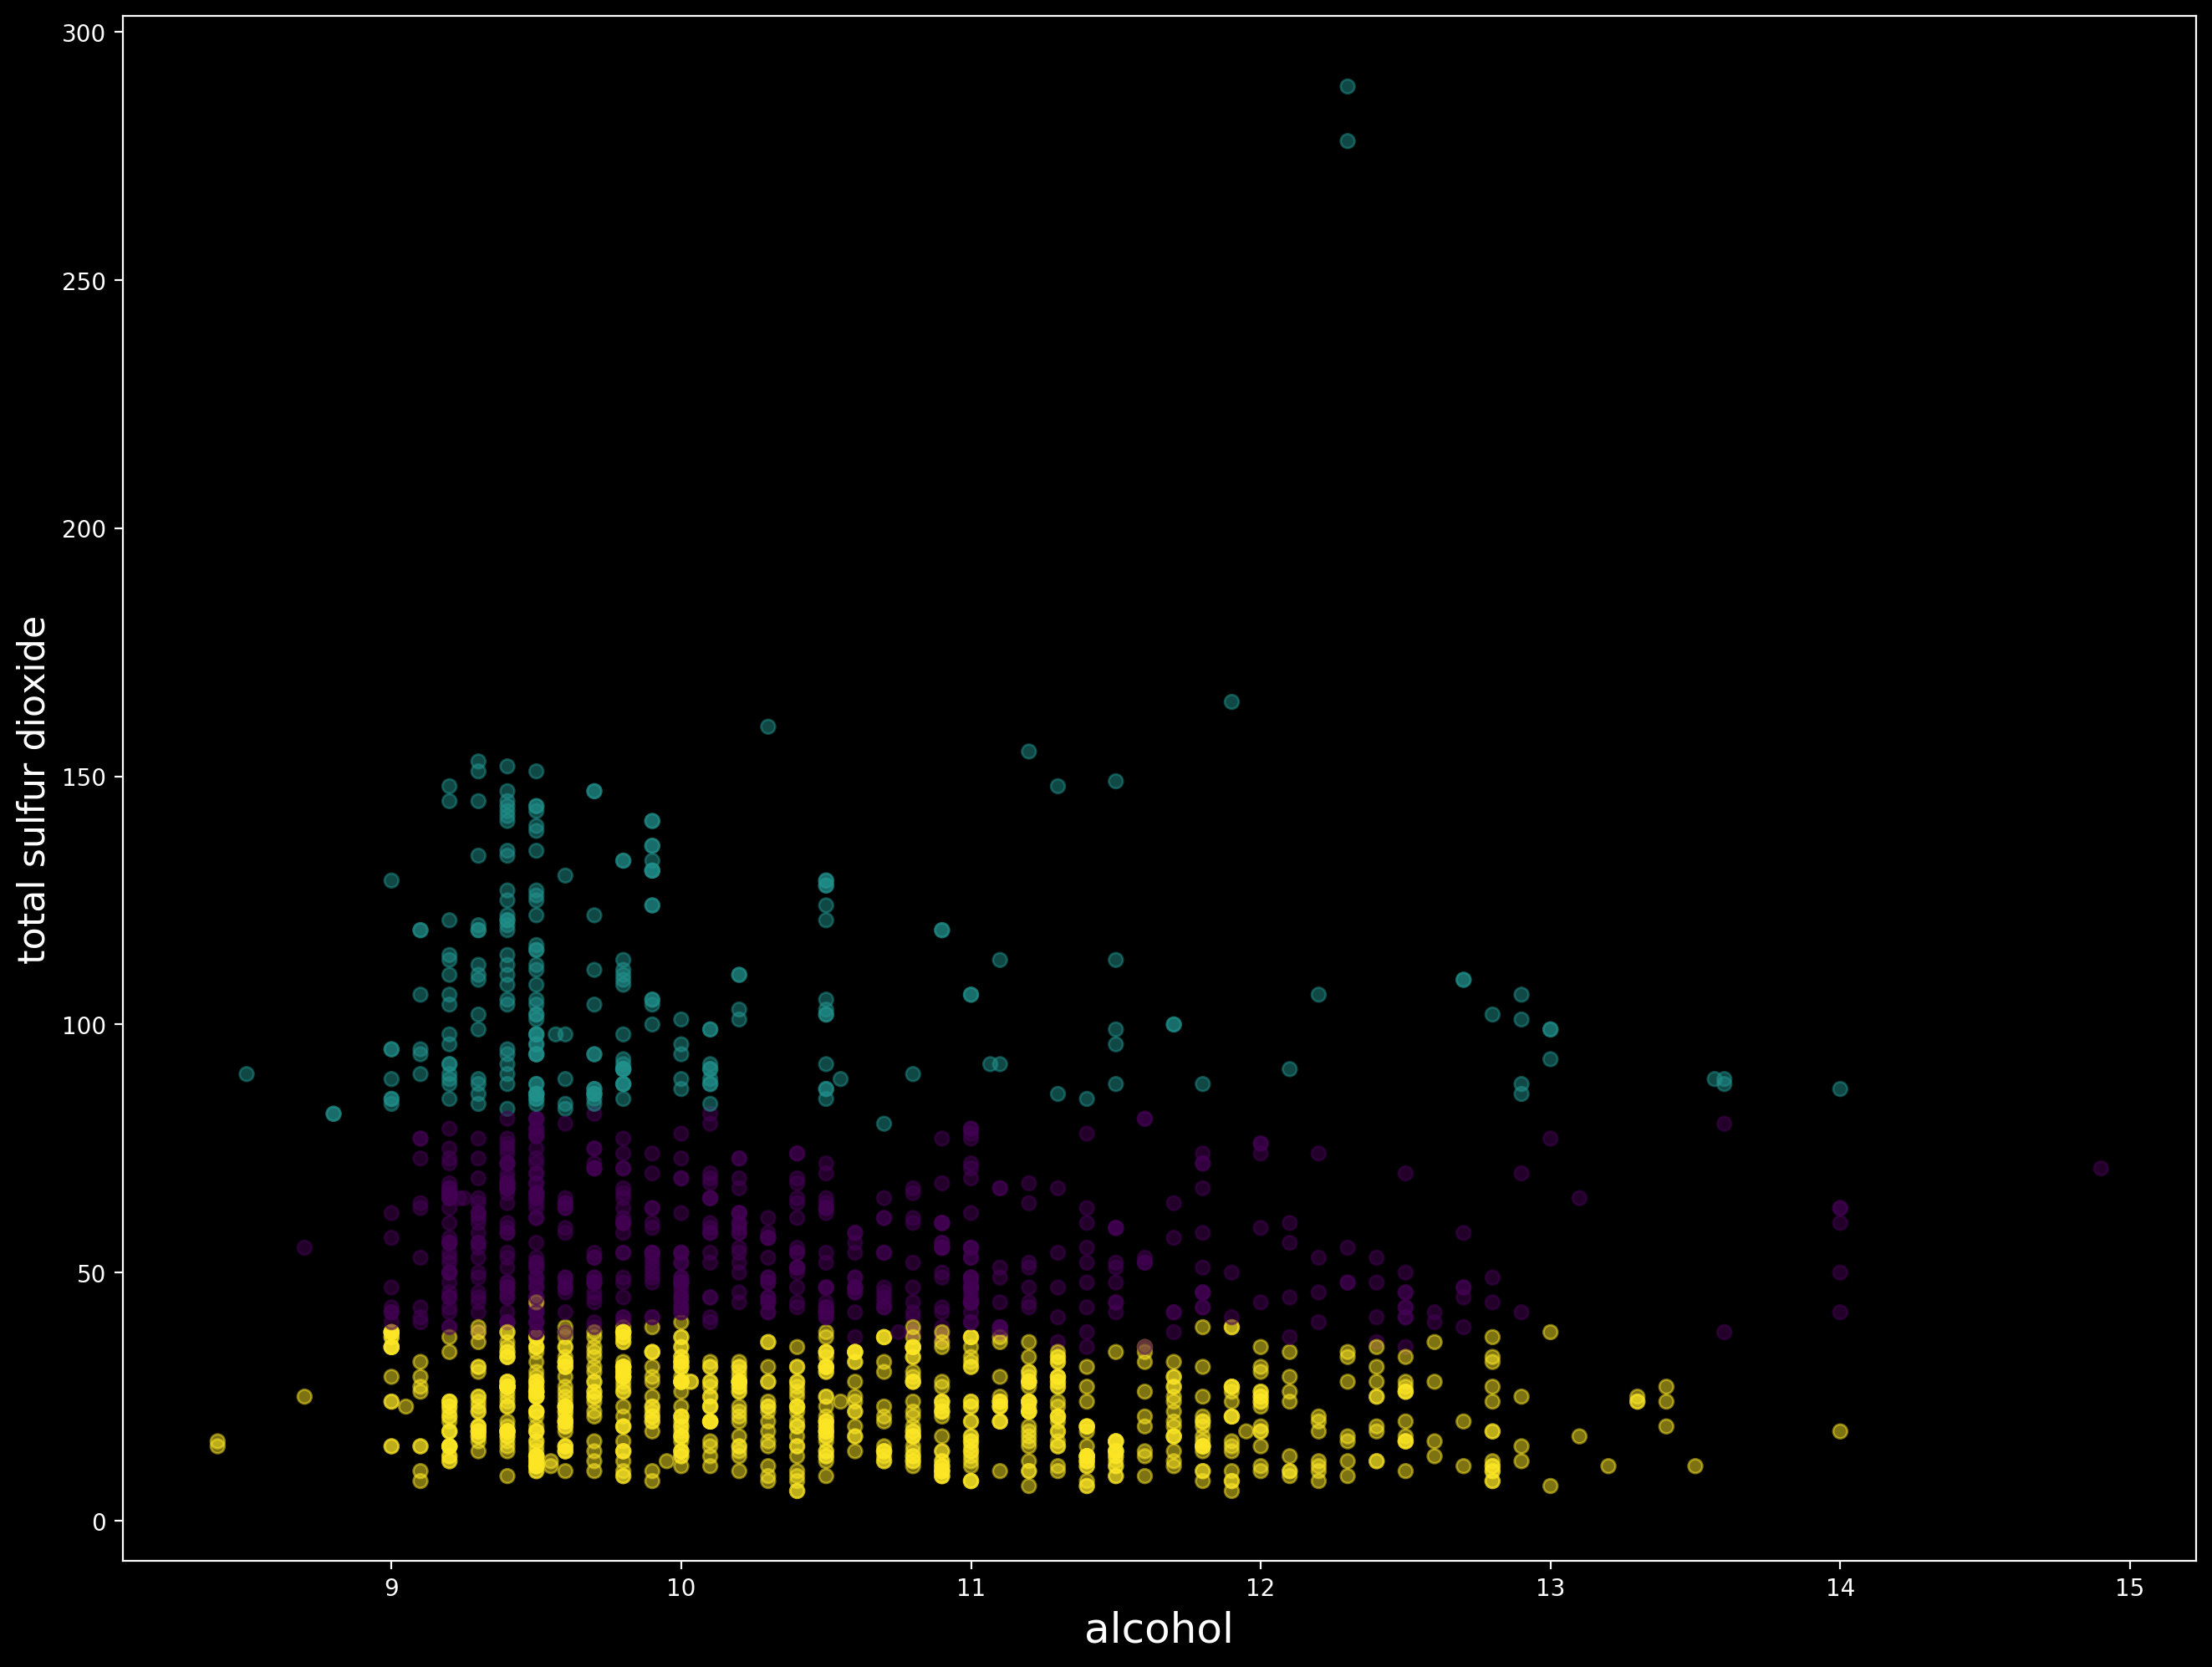

In [12]:
# create 2 and 3 dimensional graphs for first dataset
f3, ax = plt.subplots(figsize=(16, 12))
plt.scatter(X[:, 9], X[:, 5], c=labels_r.astype(np.float), alpha=.5) #2D graph
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)

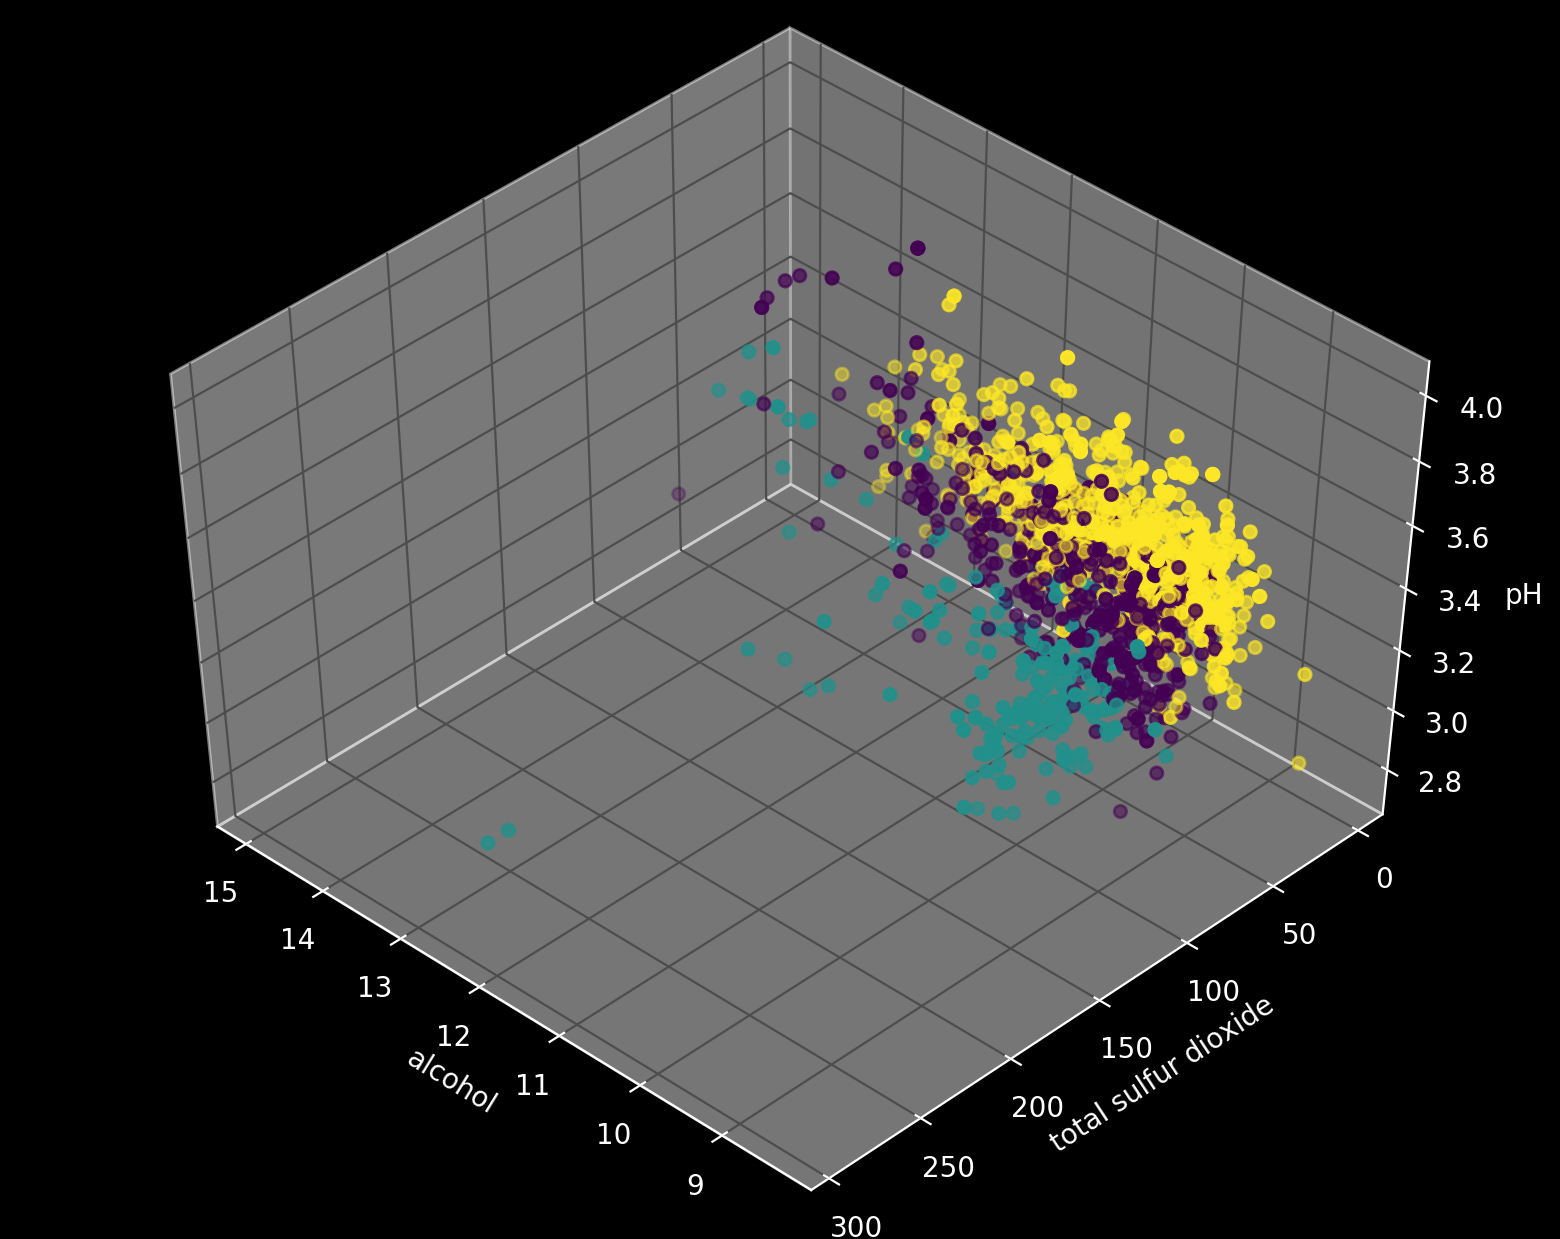

In [14]:
from mpl_toolkits.mplot3d import Axes3D
#3D graph
f4 = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(f4, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('alcohol')
ax.set_ylabel('total sulfur dioxide')
ax.set_zlabel('pH')

ax.scatter(X[:, 9], X[:, 5], X[:, 7], c= labels_r.astype(np.float))

Text(0, 0.5, 'total sulfur dioxide')

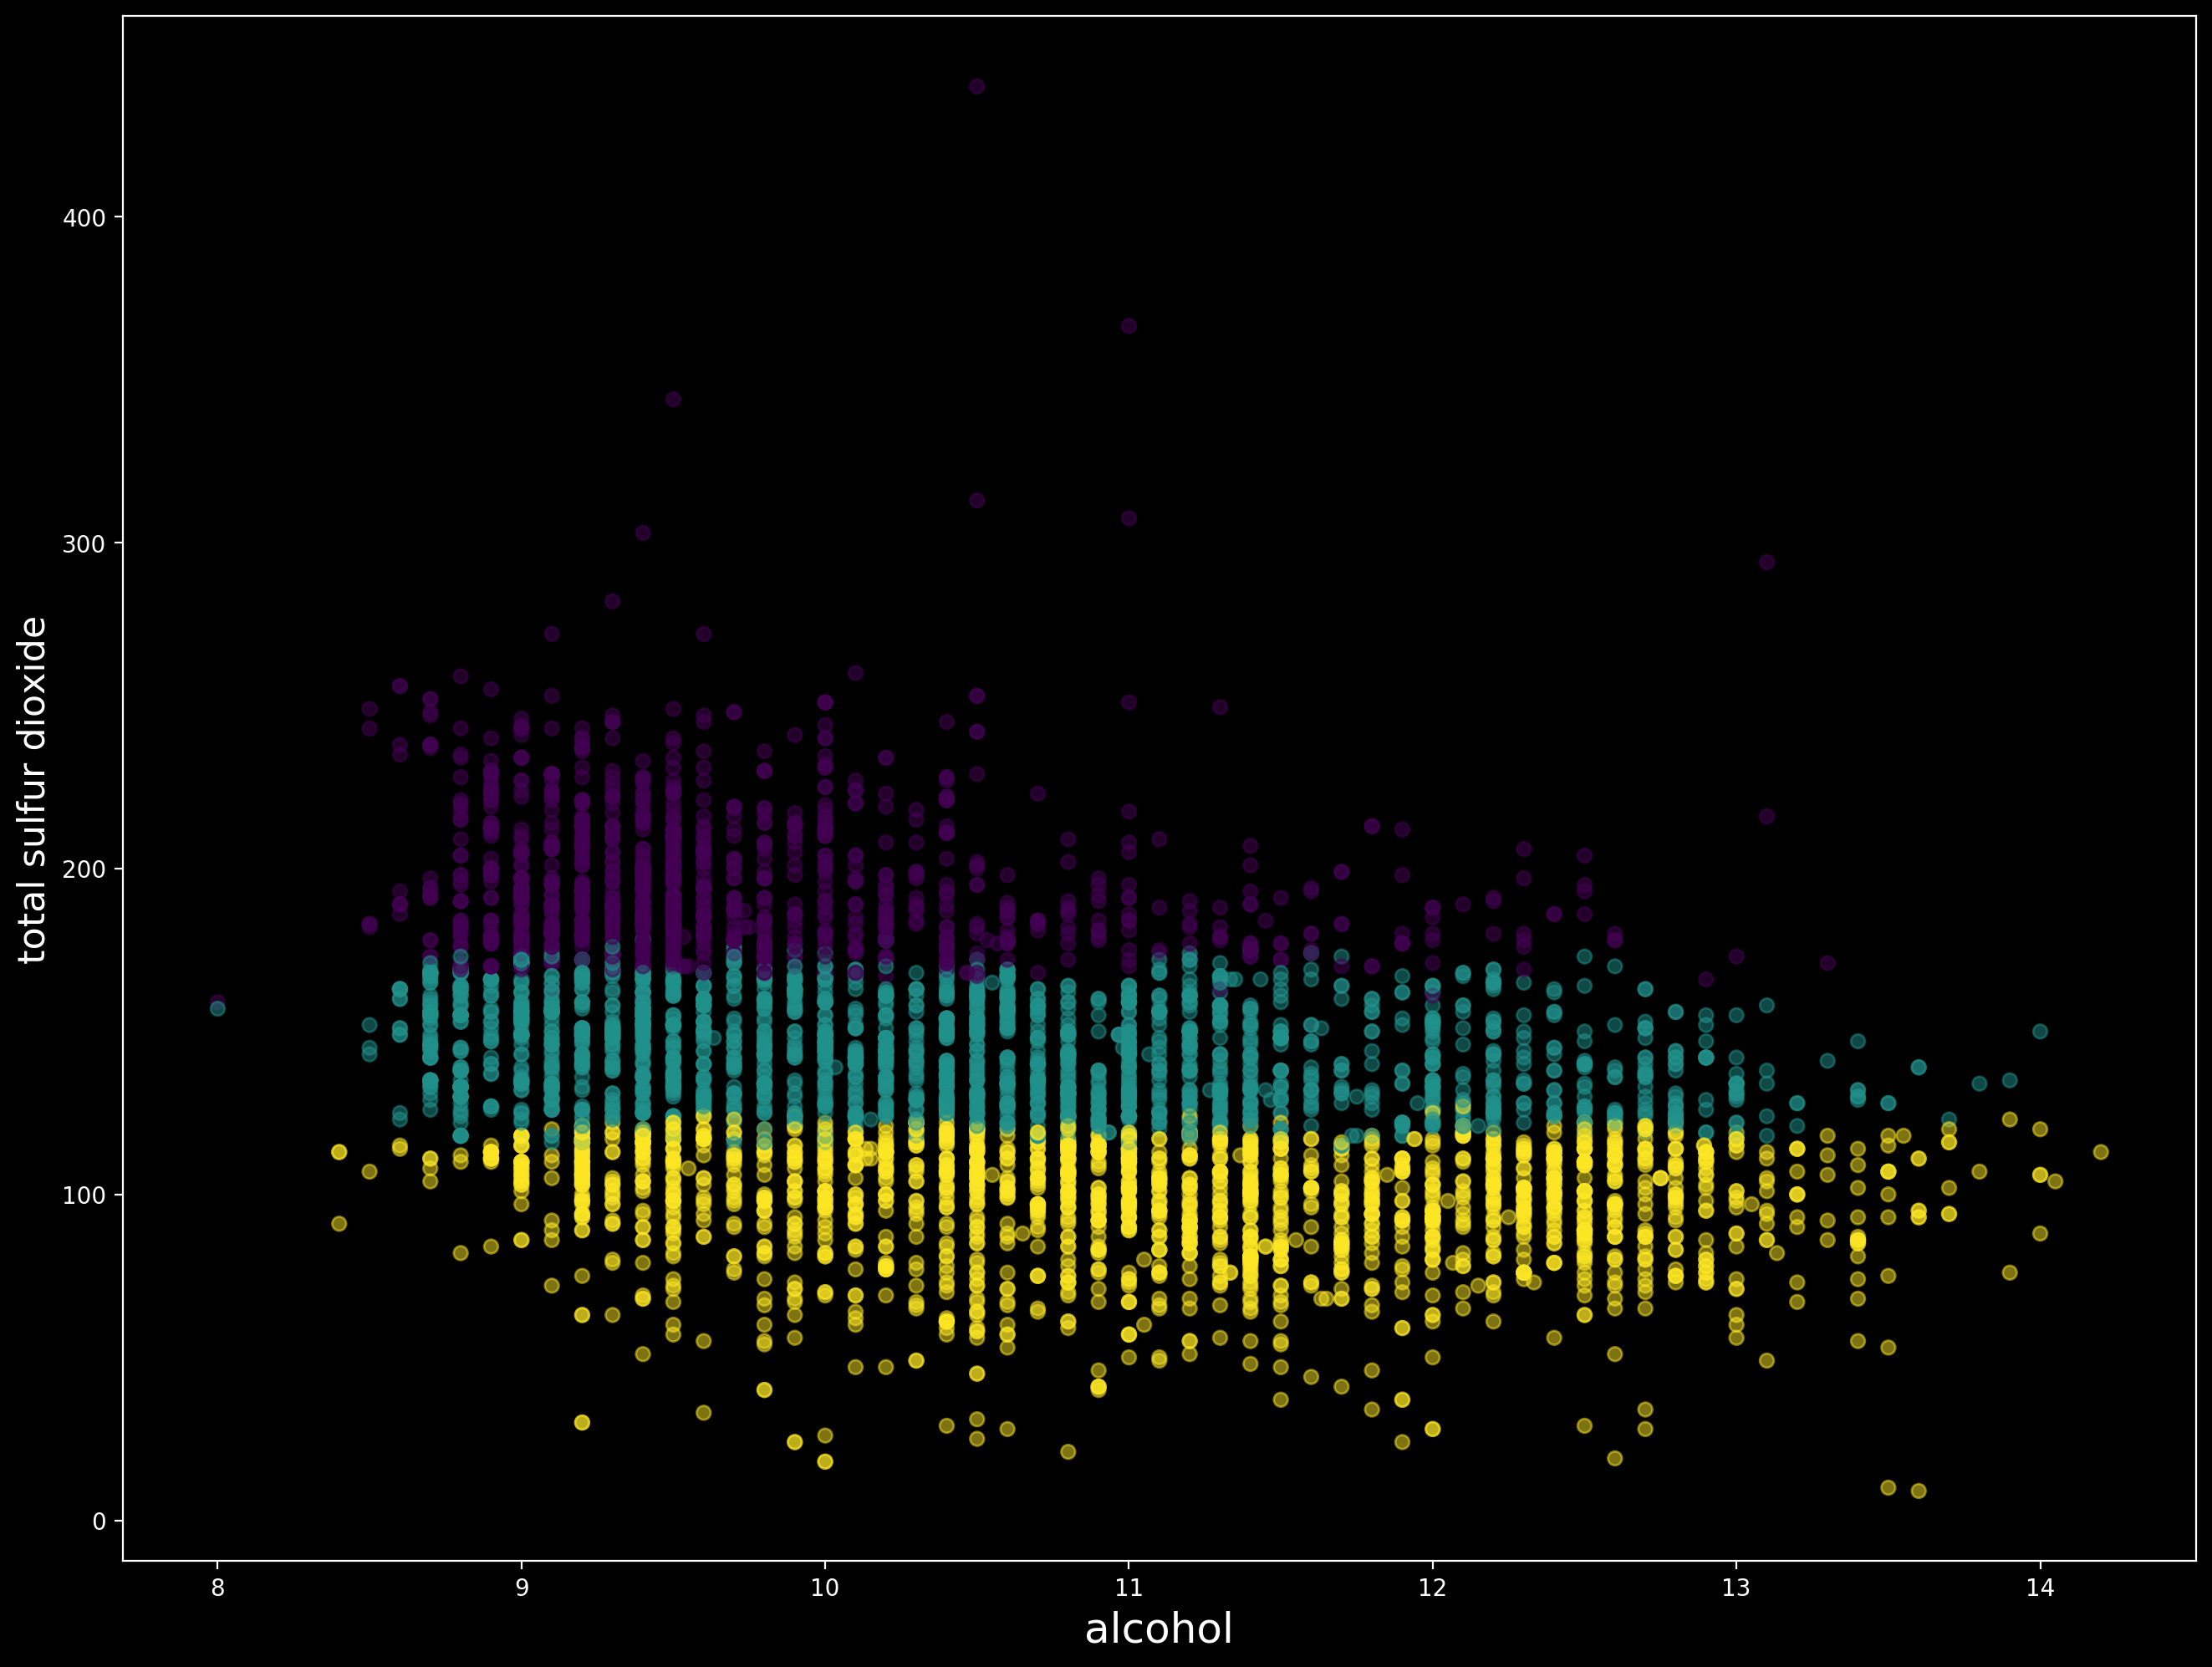

In [15]:
# and now for second dataset
f3, ay = plt.subplots(figsize=(16, 12))
plt.scatter(Y[:, 9], Y[:, 5], c=labels_w.astype(np.float), alpha=.5) #2D graph
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)

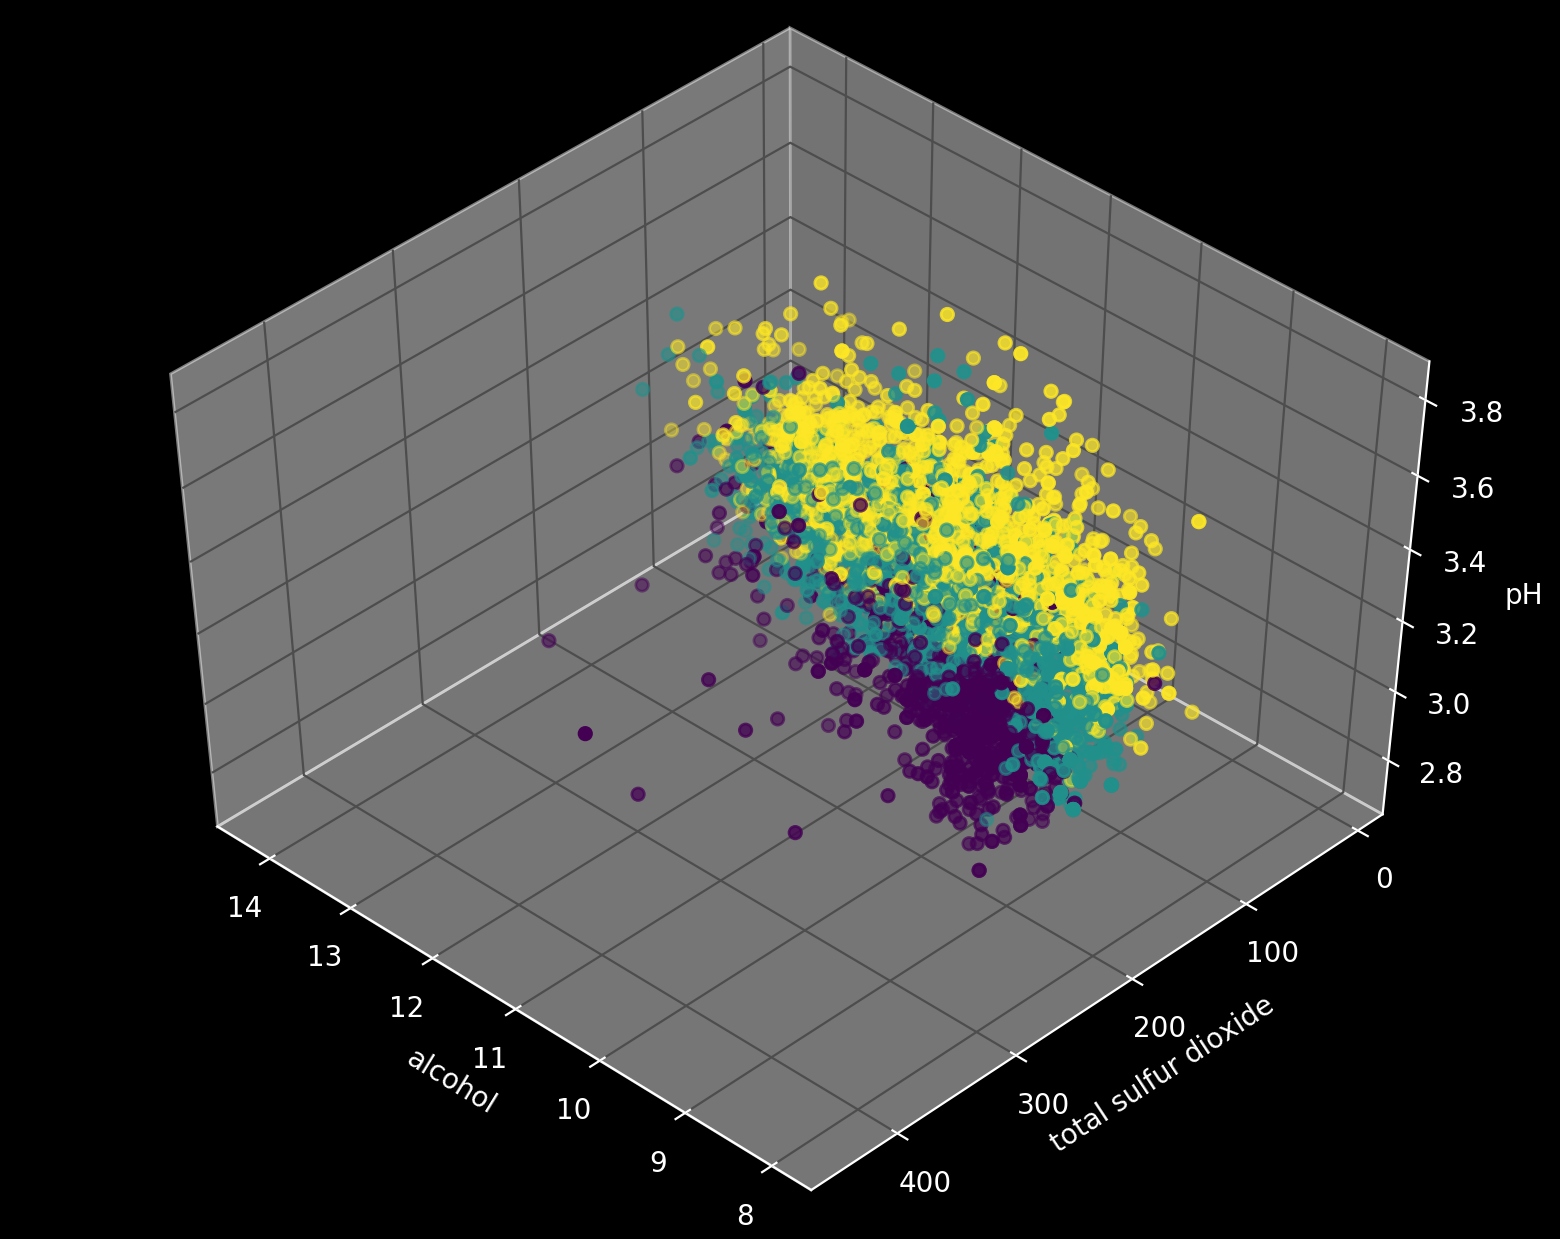

In [17]:
# 3D graph
f4 = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(f4, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('alcohol')
ax.set_ylabel('total sulfur dioxide')
ax.set_zlabel('pH')

ax.scatter(Y[:, 9], Y[:, 5], Y[:, 7], c= labels_w.astype(np.float))